# Mini Project 2 - Build a email spam detection model using Machine Learning Algorithm

## Importing the libraries and data

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"D:\Meta scifor\Mini Project 2 - Spam Detection Model\SMSSpamCollection.tsv", sep="\t", header=None)
data.head()

,0,1
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [3]:
data.columns=['label','text'] #naming the columns
pd.set_option('display.max_colwidth',None) #to display full message
data.head()

,label,text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [4]:
data.info() #prints the basic info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5568 non-null   object
 1   text    5568 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB


## Data Cleaning

In [5]:
data.isna().sum() #to find out the missing values in the dataset

label    0
text     0
dtype: int64

There are no missing values in the dataset

In [6]:
data.duplicated().sum() #To check for duplicated values in the dataset

403

There are 403 duplicated values in the dataset

In [7]:
data[data.duplicated()] #Data Duplicated

,label,text
99,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
150,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
203,ham,"As I entered my cabin my PA said, '' Happy B'day Boss !!''. I felt special. She askd me 4 lunch. After lunch she invited me to her apartment. We went there."
219,ham,"Sorry, I'll call later"
322,ham,No calls..messages..missed calls
...,...,...
5520,spam,You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p p£3.99
5531,ham,"I know you are thinkin malaria. But relax, children cant handle malaria. She would have been worse and its gastroenteritis. If she takes enough to replace her loss her temp will reduce. And if you give her malaria meds now she will just vomit. Its a self limiting illness she has which means in a few days it will completely stop"
5535,ham,Just sleeping..and surfing
5549,ham,Hahaha..use your brain dear


In [8]:
data.drop_duplicates(keep='first',inplace=True)  #Dropping the duplicates keeping the first instance alone

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 0 to 5567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5165 non-null   object
 1   text    5165 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [10]:
data['label'].value_counts() #checking for how many spam and non- spam mails 

ham     4513
spam     652
Name: label, dtype: int64

In the given dataset, there are 652 spam mails and 4513 non-spam/ham mails

## Data Visualisation

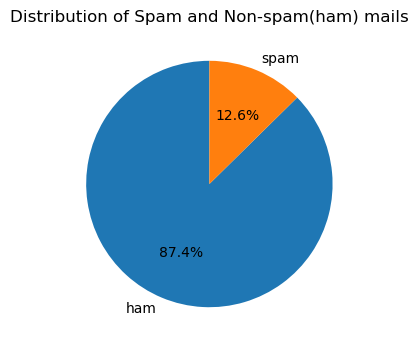

In [11]:
plt.figure(figsize=(4,4))
plt.pie(data['label'].value_counts(), labels=data['label'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Spam and Non-spam(ham) mails")
plt.show()

Out of the total mails, 12.6% are spam and 87.4% are ham

Let us check for the length of spam and non-spam mails.

In [12]:
data['Length of Original Text']=data['text'].apply(len) #to find the length of each message

In [13]:
data.head()

,label,text,Length of Original Text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,196
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155
2,ham,"Nah I don't think he goes to usf, he lives around here though",61
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,77
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,35


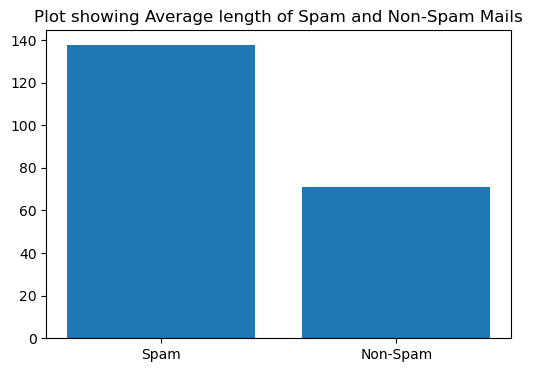

Average length of Spam mail is 137.69
Average length of Non-Spam mail is 70.91


In [14]:
avg_len_spam=data[data['label']=='spam']['Length of Original Text'].mean().round(2)
avg_len_ham=data[data['label']=='ham']['Length of Original Text'].mean().round(2)

plt.figure(figsize=(6,4))
plt.bar(['Spam','Non-Spam'],[avg_len_spam,avg_len_ham])
plt.title("Plot showing Average length of Spam and Non-Spam Mails")
plt.show()

print("Average length of Spam mail is", avg_len_spam)
print("Average length of Non-Spam mail is", avg_len_ham)  #average length of spam and non-spam mail

From the above graph, it is clear that average length of spam mail is longer than a non-spam mail

## Data Preprocessing

Before building the model for training, let us do data cleaning as there are stop words, punctuations etc in our text

In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])#Removing punctuations
    tokens = nltk.word_tokenize(text)#tokenisation
    text = [word for word in tokens if word not in stopwords]#removing stopwords
    return text

data['Cleaned Text'] = data['text'].apply(lambda x: clean_text(x.lower())) 

data.head()

,label,text,Length of Original Text,Cleaned Text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,196,"[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, promise, wonderful, blessing, times]"
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
2,ham,"Nah I don't think he goes to usf, he lives around here though",61,"[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,77,"[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,35,"[date, sunday]"


Now in column Cleaned Text --> the text is cleaned without stopwords, punctuations etc. Next let us find the root words for the text using Word Net Lemmatizer

In [18]:
wn=nltk.WordNetLemmatizer() #Lemmatizing the text

In [19]:
data['Lemmatized Text']=data['Cleaned Text'].apply(lambda x: [wn.lemmatize(word) for word in x])

In [20]:
data.head()

,label,text,Length of Original Text,Cleaned Text,Lemmatized Text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,196,"[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, promise, wonderful, blessing, times]","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promise, wonderful, blessing, time]"
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
2,ham,"Nah I don't think he goes to usf, he lives around here though",61,"[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,77,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,35,"[date, sunday]","[date, sunday]"


In [21]:
data['text_final']=data['Lemmatized Text'].apply(lambda x: " ".join(x)) #Lemmatized text combined to a string

In [22]:
data['text_final'].apply(lambda x: len(x.split(' '))).sum()

48151

After text cleaning and removing stop words, we have only over 48000 words to work with!

In [23]:
spam_mails=data[data['label']=='spam']['text_final'] #to extract spam mails alone
spam_words=' '.join(spam_mails).split()
 #tokensie and create list of words in spam mails

In [24]:
from collections import Counter
word_counts=Counter(spam_words)
#creates a dictionary of words with their counts

In [25]:
most_common_words=word_counts.most_common(15)
print("Top 15 Most Common Words in Spam Emails:")
most_common_words

Top 15 Most Common Words in Spam Emails:


[('call', 314),
 ('free', 188),
 ('2', 155),
 ('u', 131),
 ('txt', 126),
 ('text', 120),
 ('ur', 119),
 ('mobile', 114),
 ('stop', 105),
 ('claim', 98),
 ('4', 97),
 ('reply', 94),
 ('prize', 82),
 ('get', 69),
 ('new', 64)]

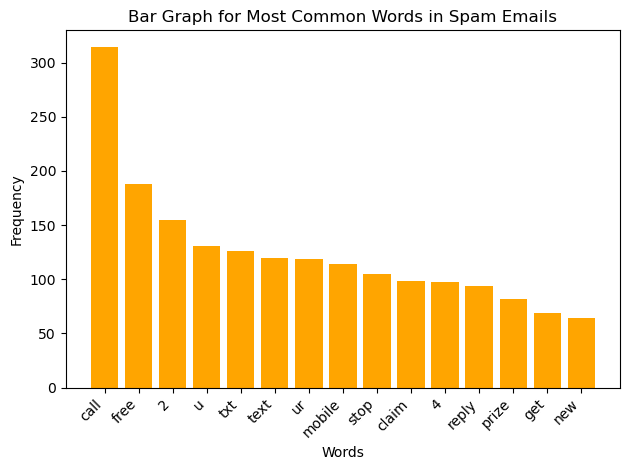

In [26]:
words, counts = zip(*most_common_words)
plt.bar(words, counts, color='orange')
plt.title('Bar Graph for Most Common Words in Spam Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Label Encoding

As the label for a text is in categorical, to train a machine learning model, it should be in numbers, hence encoding the label column using Label Encoder to 0 and 1

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Encoded Label']=encoder.fit_transform(data['label'])
data.head() 

,label,text,Length of Original Text,Cleaned Text,Lemmatized Text,text_final,Encoded Label
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,196,"[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, promise, wonderful, blessing, times]","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promise, wonderful, blessing, time]",ive searching right word thank breather promise wont take help granted fulfil promise wonderful blessing time,0
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]",free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s,1
2,ham,"Nah I don't think he goes to usf, he lives around here though",61,"[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, go, usf, life, around, though]",nah dont think go usf life around though,0
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,77,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]",even brother like speak treat like aid patent,0
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,35,"[date, sunday]","[date, sunday]",date sunday,0


From the above, we can see that **ham mails are encoded to 1, spam --> 0**

**Vectorisation** --> converts input data from its raw format (i.e. text ) into vectors of real numbers which is the format that ML models support

TF-IDF Vectoriser scores the words based on its importance 

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf=TfidfVectorizer(max_features=3000)#given to take only top 3000 features alone for training

## Model building

In [29]:
X=tf_idf.fit_transform(data['text_final']).toarray() #X data

In [30]:
y=data['Encoded Label'] #y

In [31]:
X[:10] #X array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
from sklearn.model_selection import train_test_split  #splitting the data into train and test 20% held for testing
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

In [33]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape #Shape of train and test data

((4132, 3000), (1033, 3000), (4132,), (1033,))

## Support Vector Classifier

In [34]:
from sklearn.svm import SVC #SVC Classifier is used

In [35]:
svc_classifier=SVC() #building the model

In [36]:
svc_classifier.fit(X_train,y_train)
y_pred_svc=svc_classifier.predict(X_test) #data fitting and prediction using built model

## Model Evaluation

In [37]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

In [38]:
print("Accuracy using SVM classifier: ", accuracy_score(y_test, y_pred_svc))
print("Precision using SVM classifier: ", precision_score(y_test, y_pred_svc))
print("Confusion Matrix ", confusion_matrix(y_test,y_pred_svc))
cm= confusion_matrix(y_test,y_pred_svc)

Accuracy using SVM classifier:  0.9767666989351403
Precision using SVM classifier:  0.9811320754716981
Confusion Matrix  [[905   2]
 [ 22 104]]


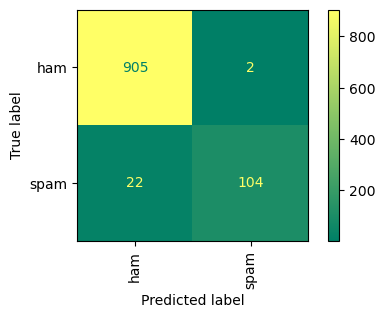

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
labels=['ham','spam']
#Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
fig, ax = plt.subplots(figsize=(5, 3))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

### Inference

From the above confusion matrix, it is clear that out of 907 non-spam mails, 905 identifed correctly and 2 are predicted as spam

104 spam mails are classified correctly, but 22 spam mails are classified as non-spam.

This can be due to the imbalance in the training data.

In [40]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       907
           1       0.98      0.83      0.90       126

    accuracy                           0.98      1033
   macro avg       0.98      0.91      0.94      1033
weighted avg       0.98      0.98      0.98      1033



## User Input and Prediction

In [41]:
def user_input_predict(input_text):
    input_vector=tf_idf.transform([input_text])
    
    input_vector_array=input_vector.toarray()
    
    input_pred=svc_classifier.predict(input_vector_array)
    
    if input_pred==1:
        print("The mail is spam")
    elif input_pred==0:
        print("The mail is non-spam/ham")

In [42]:
text_input=input("Enter the mail text: ")
user_input_predict(text_input)

Enter the mail text: free gift call me
The mail is spam


In [43]:
text_input=input("Enter the mail text: ")
user_input_predict(text_input)

Enter the mail text: call me when free
The mail is non-spam/ham


## Naive Bayes Classifier

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
nbc=MultinomialNB()

In [46]:
nbc.fit(X_train,y_train)

MultinomialNB()

In [47]:
y_pred_nbc=nbc.predict(X_test)

In [48]:
print("Accuracy using Naive Bayes classifier: ", accuracy_score(y_test, y_pred_nbc))
print("Precision using Naive Bayes classifier: ", precision_score(y_test, y_pred_nbc))
print("Confusion Matrix ", confusion_matrix(y_test,y_pred_nbc))
cm_nbc= confusion_matrix(y_test,y_pred_nbc)

Accuracy using Naive Bayes classifier:  0.9806389157792836
Precision using Naive Bayes classifier:  0.9818181818181818
Confusion Matrix  [[905   2]
 [ 18 108]]


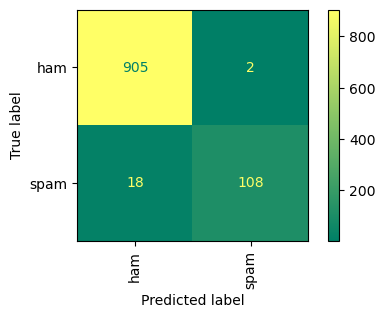

In [49]:
#Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nbc,
                              display_labels=labels)
fig, ax = plt.subplots(figsize=(5, 3))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

### Inference

From the above confusion matrix, it is clear that out of 907 non-spam mails, 905 identifed correctly and 2 are predicted as spam

108 spam mails are classified correctly, but 18 spam mails are classified as non-spam.

Thus here it performs better than SVC

## Decision Tree Classifier

Let us build a Decision Tree Classifier for the above data

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
DT_classifier=DecisionTreeClassifier()
DT_classifier.fit(X_train,y_train)
y_pred_DTC=DT_classifier.predict(X_test)

In [52]:
print("Accuracy using DT classifier: ", accuracy_score(y_test, y_pred_DTC))
print("Precision using DT classifier: ", precision_score(y_test, y_pred_DTC))
print("Confusion Matrix ", confusion_matrix(y_test,y_pred_DTC))

Accuracy using DT classifier:  0.9632139399806389
Precision using DT classifier:  0.84375
Confusion Matrix  [[887  20]
 [ 18 108]]


In [53]:
print(classification_report(y_test,y_pred_DTC))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       907
           1       0.84      0.86      0.85       126

    accuracy                           0.96      1033
   macro avg       0.91      0.92      0.91      1033
weighted avg       0.96      0.96      0.96      1033



Its performance can be lower due to the imbalance in the data

From the above models, it can be seen that performance of NBC > SVC > Decision Tree Classifier

References:
   
    1. https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568#:~:text=Linear%20Support%20Vector%20Machine%20is,the%20best%20text%20classification%20algorithms.
    
    2. https://www.geeksforgeeks.org/naive-bayes-vs-svm-for-text-classification/
    
    3. https://medium.com/@azimkhan8018/email-spam-detection-with-machine-learning-a-comprehensive-guide-b65c6936678b